In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('spam.csv',encoding='latin1')

In [ ]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.shape

(5572, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
##dropping unwanted columns
df.drop(columns=['Unnamed: 2',	'Unnamed: 3','Unnamed: 4'],inplace=True,axis=1)

In [ ]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
df.rename(columns={'v1':'label'},inplace=True)
df.rename(columns={'v2':'sms'},inplace=True)


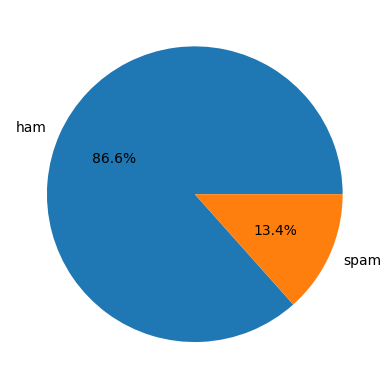

In [ ]:
##visualizing how many hams and spams are there

plt.pie(df.label.value_counts(),labels=['ham','spam'],autopct='%1.1f%%')
plt.show()
##seems like dataset is imbalanced

In [ ]:
df['num_characters'] = df['sms'].apply(len)

In [ ]:
##counting number of words and number of sentences
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from nltk.tokenize import word_tokenize,sent_tokenize

In [ ]:
df['num_words'] = df['sms'].apply(lambda x: len(word_tokenize(x)))
df['num_sentence'] = df['sms'].apply(lambda x: len(sent_tokenize(x)))

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

df['label']= encoder.fit_transform(df['label'])

In [ ]:
df

,label,sms,num_characters,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [ ]:
df[['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,5572.000000,5572.000000,5572.000000
mean,80.118808,18.699390,1.996411
std,59.690841,13.741932,1.520159
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.500000
75%,121.000000,27.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
###e=describing ham
df[df['label']==0][['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,4825.000000,4825.000000,4825.000000
mean,71.023627,17.276269,1.837720
std,58.016023,13.988585,1.454388
min,2.000000,1.000000,1.000000
25%,33.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,92.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
df[df['label']==1][['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,747.000000,747.000000,747.000000
mean,138.866131,27.891566,3.021419
std,29.183082,6.867007,1.537580
min,13.000000,2.000000,1.000000
25%,132.500000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


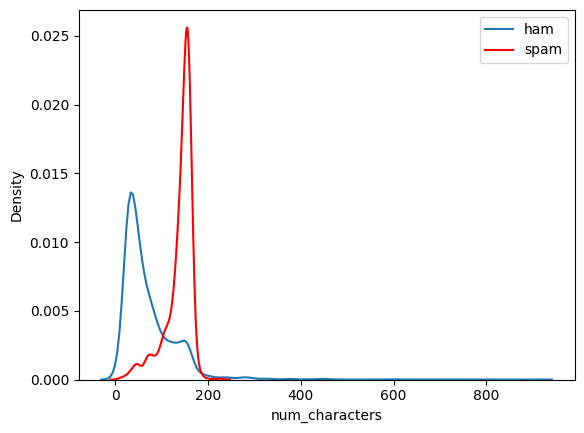

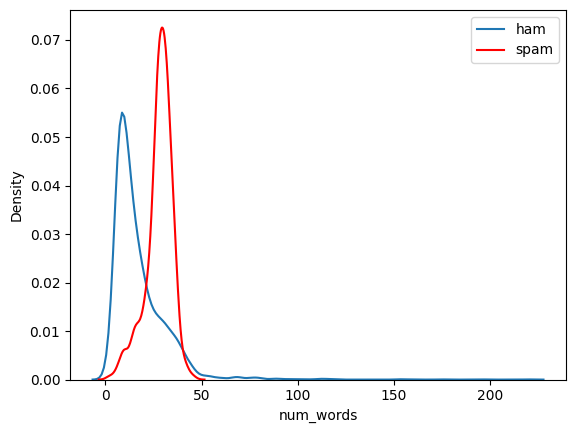

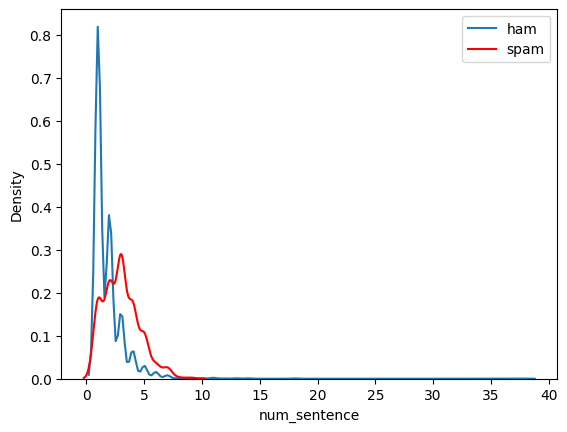

In [ ]:
a = ['num_characters','num_words','num_sentence']
for i in range(len(a)):
  sns.kdeplot(df[df['label'] == 0][a[i]],label='ham')
  sns.kdeplot(df[df['label'] == 1][a[i]] , color = 'red',label='spam')
  plt.legend()
  plt.show()
##spam messages have more characters and words but have very less sentences compared to ham 

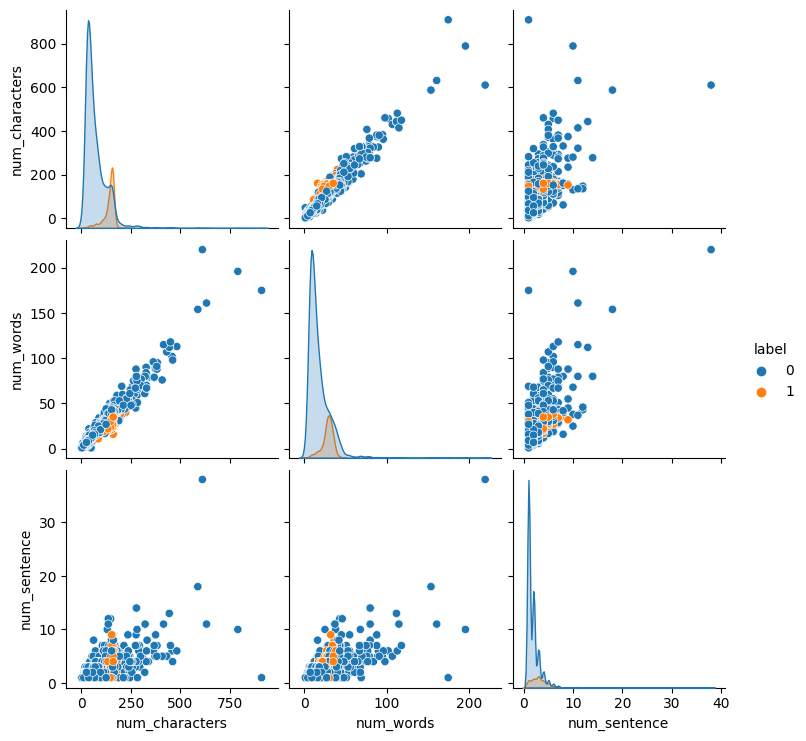

In [ ]:
sns.pairplot(df,hue = 'label')

<ipython-input-21-7016aa2d9349>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap="viridis")


<Axes: >

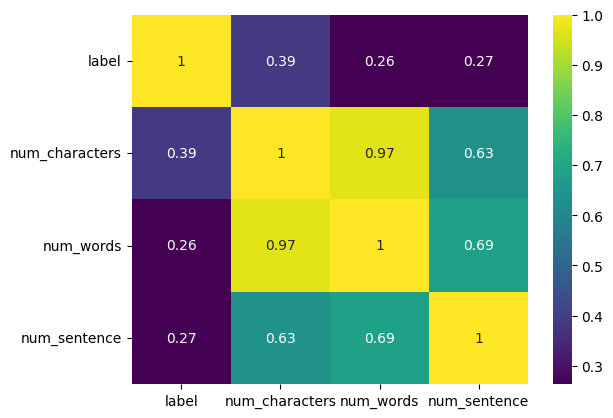

In [ ]:
sns.heatmap(df.corr(),annot=True,cmap="viridis")

There is high correlation between every column data shows multicolinearity

Text(0.5, 1.0, 'HAM')

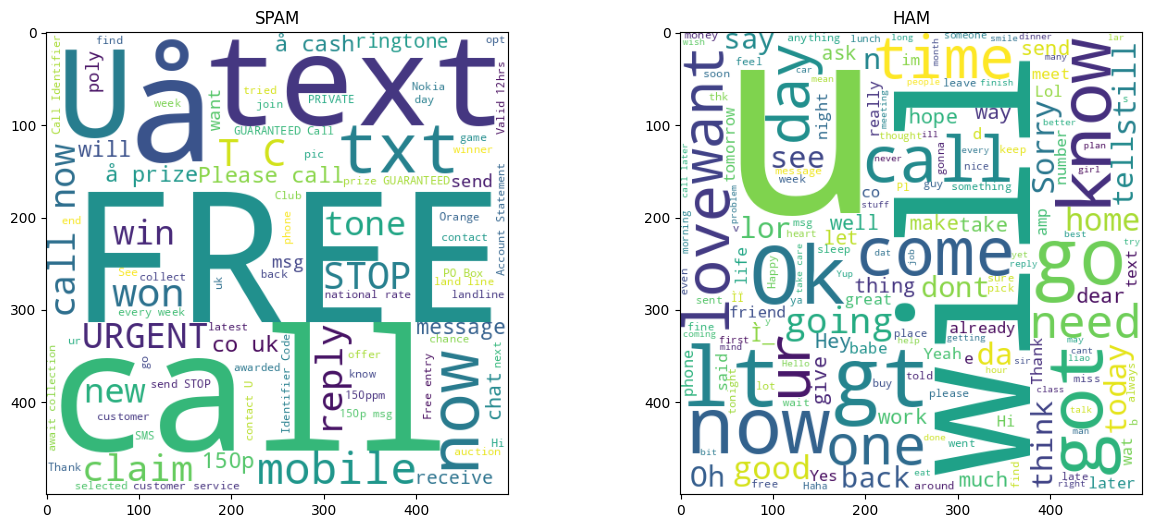

In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')
fig,axes = plt.subplots(1,2,figsize=(15,6))

axes[0].imshow(wc.generate(df[df['label']==1]['sms'].str.cat(sep=" ")))
axes[0].set_title('SPAM')
axes[1].imshow(wc.generate(df[df['label']==0]['sms'].str.cat(sep=" ")))
axes[1].set_title('HAM')


In [ ]:
df

,label,sms,num_characters,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [ ]:
df.duplicated().sum()

df = df.drop_duplicates(keep='first') 

In [ ]:
###data preprocessing
# 1. lower case
# 2. tokenization
# 3. removing special characters
# 4. removing stop words and punctuation
# 5. stemming (merging all same meaning words to a single word)

In [ ]:
import string
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
ps = PorterStemmer()

from string import punctuation
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
p = stopwords.words('english')
def preprocessed(text):
  text = text.lower()
  text = word_tokenize(text)
  y = []
  for i in text:
    if i.isalnum():
      if i not in stopwords.words('english'):
        if i not in string.punctuation:
          lemmatizer = WordNetLemmatizer()
          i = lemmatizer.lemmatize(i)
          y.append(i)
  return ' '.join(y)
  

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df['transformed']= df['sms'].apply(preprocessed)

<ipython-input-27-a827424794ea>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed']= df['sms'].apply(preprocessed)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=2100)



In [ ]:
#X = cv.fit_transform(df['transformed'])
X = tfidf.fit_transform(df['transformed'])
X=X.toarray()
y = df.iloc[:,0]
from sklearn.model_selection import train_test_split
X_train , X_test , y_train,y_test = train_test_split(X,y,test_size=0.3)
from sklearn.naive_bayes import GaussianNB, MultinomialNB
m1 = GaussianNB()
m2 = MultinomialNB()
m1.fit(X_train,y_train)
m2.fit(X_train,y_train)
y1 = m1.predict(X_test)
y2 = m2.predict(X_test)



0.8549323017408124
0.48011363636363635


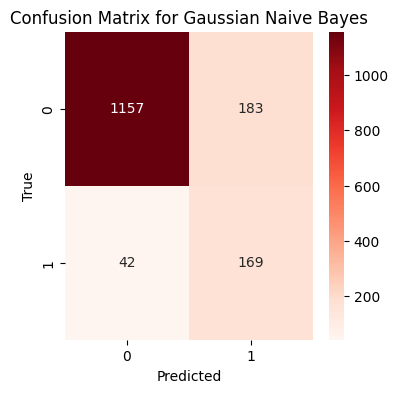

<Figure size 1000x1000 with 0 Axes>

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix
print(accuracy_score(y_test,y1))
print(precision_score(y_test,y1))
cm = confusion_matrix(y_test,y1)
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, cmap="Reds", fmt="d")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for Gaussian Naive Bayes")
plt.figure(figsize=(10,10))
plt.show()




0.9690522243713733
1.0


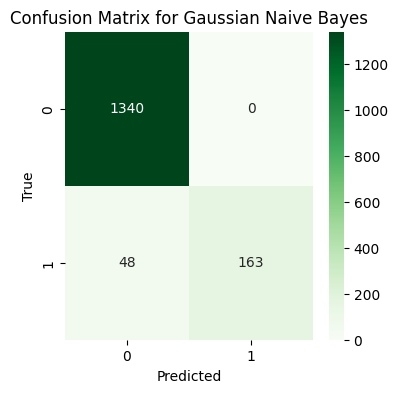

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix
print(accuracy_score(y_test,y2))
print(precision_score(y_test,y2))
cm = confusion_matrix(y_test,y2)
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, cmap="Greens", fmt="d")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for Gaussian Naive Bayes")

plt.show()


In [ ]:
import pickle

pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(m2, open('model.pkl', 'wb'))
